In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import prophet

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML DL projects/GOOG.csv")
df[:5]

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

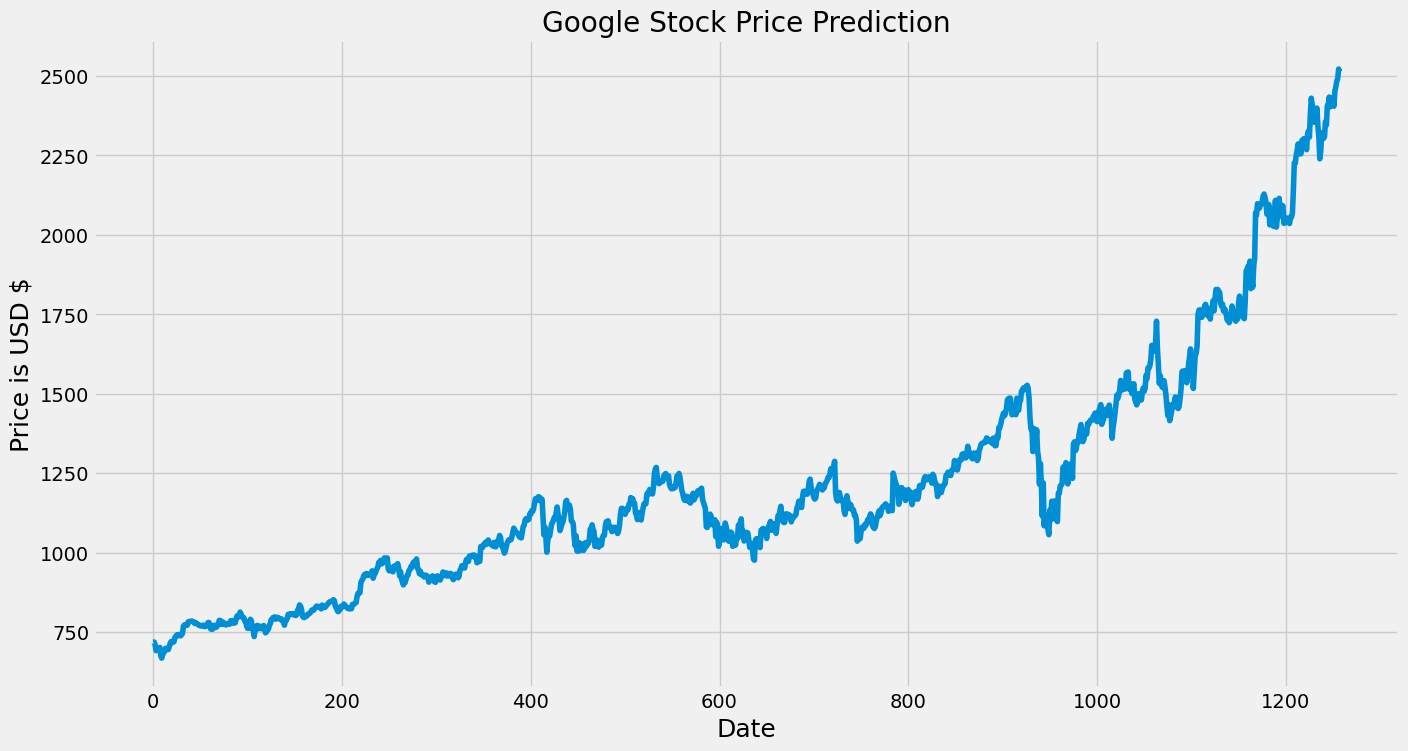

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Google Stock Price Prediction")
plt.plot(df["close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price is USD $",fontsize=18)
plt.show()

<h1>Since only for price prediction closing and date is required</h1>

In [ ]:
df=df[["date","close"]]
df=df.rename(columns={"date":"ds","close":"y"})
df.head()

,ds,y
0,2016-06-14 00:00:00+00:00,718.27
1,2016-06-15 00:00:00+00:00,718.92
2,2016-06-16 00:00:00+00:00,710.36
3,2016-06-17 00:00:00+00:00,691.72
4,2016-06-20 00:00:00+00:00,693.71


In [ ]:
# def remove_tz_from_dataframe(df_in):
#     df = df_in.copy()
#     col_times = [ col for col in df.columns if any([isinstance(x, pd.Timestamp) for x in df[col]])]
#     for col in col_times:
#         df[col] = pd.to_datetime(
#             df[col], infer_datetime_format=True)
#         df[col] = df[col].dt.tz_localize(None)
#     return df

In [ ]:
# remove_tz_from_dataframe(df)

In [ ]:
df["ds"]

0       2016-06-14 00:00:00+00:00
1       2016-06-15 00:00:00+00:00
2       2016-06-16 00:00:00+00:00
3       2016-06-17 00:00:00+00:00
4       2016-06-20 00:00:00+00:00
                  ...            
1253    2021-06-07 00:00:00+00:00
1254    2021-06-08 00:00:00+00:00
1255    2021-06-09 00:00:00+00:00
1256    2021-06-10 00:00:00+00:00
1257    2021-06-11 00:00:00+00:00
Name: ds, Length: 1258, dtype: object

In [ ]:
df["ds"]=pd.to_datetime(df["ds"])
df["ds"] = df["ds"].dt.tz_localize(None)

In [ ]:
df

,ds,y
0,2016-06-14,718.27
1,2016-06-15,718.92
2,2016-06-16,710.36
3,2016-06-17,691.72
4,2016-06-20,693.71
...,...,...
1253,2021-06-07,2466.09
1254,2021-06-08,2482.85
1255,2021-06-09,2491.40
1256,2021-06-10,2521.60


In [ ]:
from prophet import Prophet
m=Prophet(daily_seasonality=True)
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxd9xcvq/pq27irq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxd9xcvq/n29d5kt6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95370', 'data', 'file=/tmp/tmpgxd9xcvq/pq27irq2.json', 'init=/tmp/tmpgxd9xcvq/n29d5kt6.json', 'output', 'file=/tmp/tmpgxd9xcvq/prophet_model2a4i58rx/prophet_model-20230626065741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:57:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


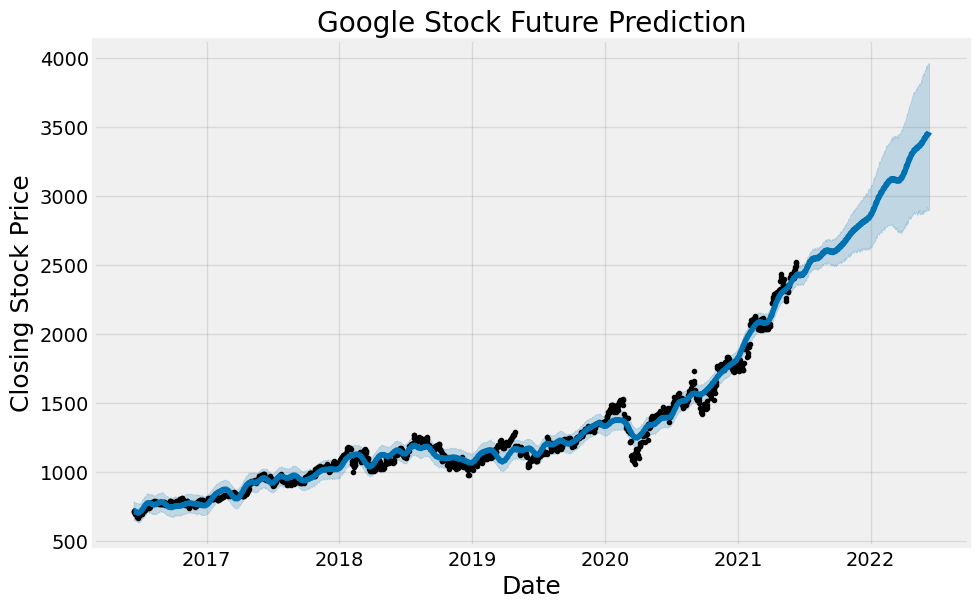

In [ ]:
future_pred=m.make_future_dataframe(365)
pred=m.predict(future_pred)
m.plot(pred)
plt.title("Google Stock Future Prediction")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Closing Stock Price",fontsize=18)
plt.show()

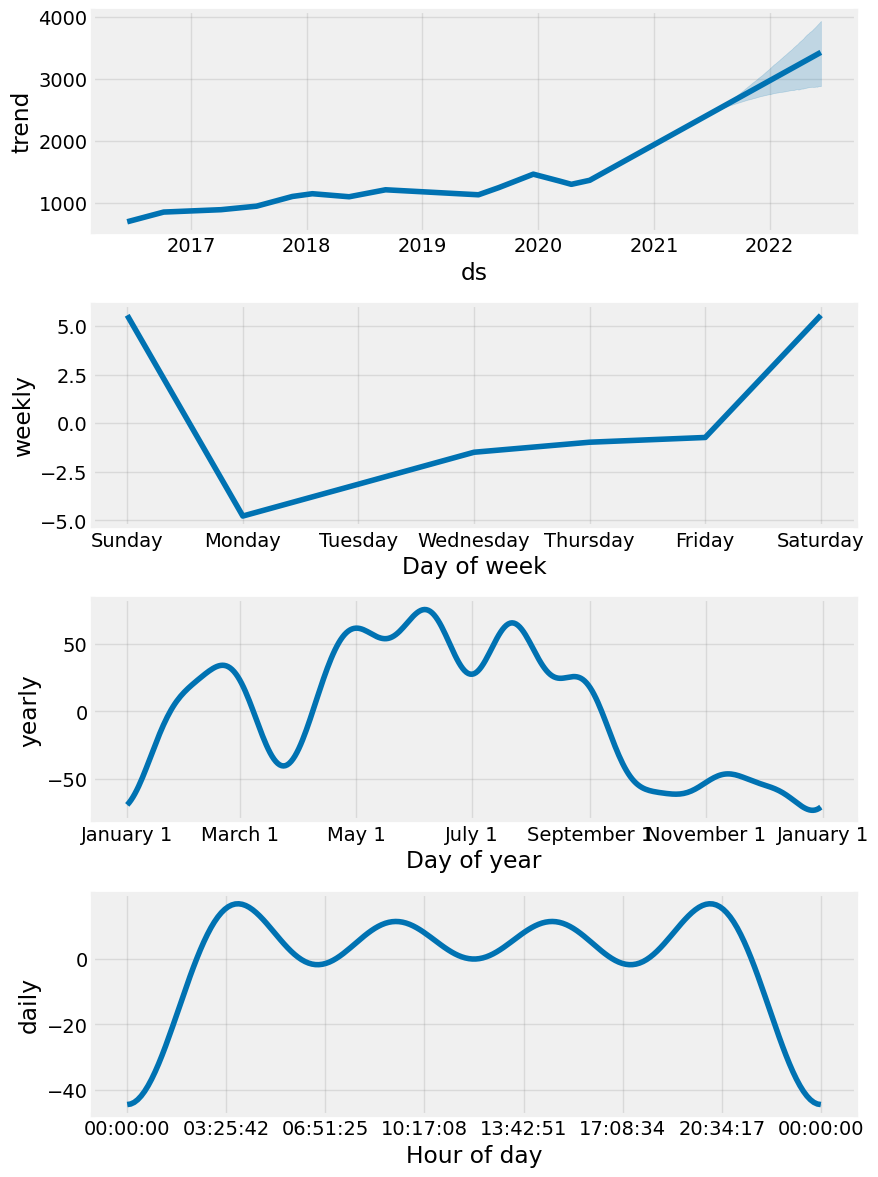

In [ ]:
m.plot_components(pred)
plt.show()